# Python Stats Testing

## Import Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.proportion import proportions_chisquare

In [15]:
import scipy

# Scenario 1

#### Fawn is a private investigator. She has taken a job for an insurance company. The insurance company has been paying out large amounts of money for workman’s comp claims, and they believe some of those claims are fraudulent. The insurance company wants Fawn and her associates to run surveillance to determine if the rate of fraud is higher than what the industry normally reports. Specifically, they want to know if the incidence of fraud among claimants is more than 16%.

#### They provide Fawn with a random sample of 94 claimants who have been diagnosed as unable to perform any physical labor beyond light housekeeping activities. They have asked Fawn to observe the sample, and report back to them how many of the claimants are obviously doing things that are much more strenuous than light housekeeping, such as strenuous yard work, weightlifting at the gym or other strenuous sporting activities, etc.

#### Fawn and her team spend about 8 weeks completing their observations, and report back to the insurance company that 28 of the 94 claimants are not nearly as “disabled” as their diagnosis suggests. The insurance company wants to test the data.

#### Complete a report for grading. The only data you need is to know that 28 of the 94 claimants are not nearly as “disabled” as their diagnosis suggests, and the hypothetical level of fraud is 16%.

## I will be running a 1 proportion z-test

In [2]:
count = 28
nobs = 94
value = .16
stat, pval = proportions_ztest(count, nobs, value)
print(stat, pval)

2.9229268377264077 0.0034675798365736213


### Our p-value indicates that our expected number of fraud incidents among claimants is significantly different from 16% and our z-score shows that the percentage is hgiher than 16%

# -------------------------------------------------

# Scenario 2

#### Medical researchers are trying to understand if four topical antiseptics are being used in the same ratio at three different clinics in town. They have access to medical records over the past 3 years, and have recorded each treatment where a topical antiseptic was used.

#### Using a tally sheet, they have determined how many times each antiseptic was used in each of the three clinics, and they want to compare the antiseptic usage across the three clinics.

#### Complete a report for grading.

## I will be running an independent Chi-Square

In [3]:
df2 = pd.read_csv("antiseptics.csv")
df2.rename(columns={'Antiseptic Type ': "AS", "Number of applications": "Count"}, inplace=True)

In [4]:
df2_pivot = pd.pivot_table(df2,index='AS',columns='Clinic',values="Count")
df2_pivot

Clinic,1,2,3
AS,,,
A,22,38,84
B,71,112,298
C,8,14,37
D,49,69,182


In [12]:
stats.chi2_contingency(df2_pivot)

(1.225920250023835,
 0.9755850789571424,
 6,
 array([[ 21.95121951,  34.09756098,  87.95121951],
        [ 73.32317073, 113.8953252 , 293.78150407],
        [  8.99390244,  13.97052846,  36.03556911],
        [ 45.73170732,  71.03658537, 183.23170732]]))

### The p-value is greater than 0.05 which means that the 3 different clinics are using the antiseptics in the same ratio. The expected arrays are all greater than 5 which means we meet the assumption to have run the chi square analysis

# -------------------------------------------------

# Scenario 3

#### A financial institution is interested in the savings practices of different demographic groups. They have demographic data for all of their account holders, and have used those criteria to split their customers up into 4 groups.

#### They are going to use the results to do some targeted marketing. In order to determine savings practices, they are going to use the average savings account balance over the past 3 months for their account holders. In other words, they will have one number (average account balance) for each account.

#### Each demographic group has between 40 and 60 accounts they will look at.

#### Complete a report for grading

## I will be running a One-Way ANOVA

In [5]:
df3 = pd.read_csv("savings.csv")
df3.head()

,Group A,Group B,Group C,Group D
0,21383.06,17077.54,13636.38,14582.73
1,19729.92,17258.06,5156.36,12880.28
2,24071.53,20652.91,4446.92,16412.72
3,19056.28,20845.06,4892.59,14020.00
4,19147.18,22296.64,14099.38,16467.70


In [6]:
df3_expanded=pd.melt(df3,var_name='Group', value_name='$')

In [7]:
df3_expanded

,Group,$
0,Group A,21383.06
1,Group A,19729.92
2,Group A,24071.53
3,Group A,19056.28
4,Group A,19147.18
...,...,...
227,Group D,12180.86
228,Group D,12972.11
229,Group D,12068.83
230,Group D,16064.42


In [8]:
df3_expanded = df3_expanded.replace(df3.columns, [0,1,2,3])
df3_expanded.head()

,Group,$
0,0,21383.06
1,0,19729.92
2,0,24071.53
3,0,19056.28
4,0,19147.18


In [13]:
df3_expanded.Group.value_counts()

0    58
1    58
2    58
3    58
Name: Group, dtype: int64

### Plot Dependent Variable

/Users/michaelwilt/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

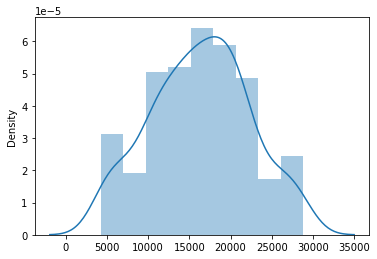

In [9]:
sns.distplot(df3.values[~np.isnan(df3.values)])

In [16]:
scipy.stats.bartlett(df3_expanded["$"], df3_expanded["Group"])

BartlettResult(statistic=3639.1753663764925, pvalue=0.0)

#### Violates the Homogeneity of Variance

In [17]:
df3_expanded.dropna(inplace=True)

### Run ANOVA

In [18]:
stats.f_oneway(df3_expanded["$"][df3_expanded["Group"]==0],
              df3_expanded["$"][df3_expanded["Group"]==1],
              df3_expanded["$"][df3_expanded["Group"]==2],
              df3_expanded["$"][df3_expanded["Group"]==3])

F_onewayResult(statistic=203.25514198903812, pvalue=1.9933595578005075e-61)

### Our p-value is less than 0.05 which means that the average account balance between groups, pover the past 3 months, is significantly different between each other.

# -------------------------------------------------

# Scenario 4 

#### The local school board conducted a poll to gauge public sentiment about a school bond. They asked respondents if they favored or opposed a bond in the upcoming election. The respondents were asked some demographic questions, too.

#### Complete a report for grading. The counts for the different groups are as follows:

#### With school age children and favorable - 374
#### With school age children and unfavorable - 129
#### Without school age children and favorable - 171
#### Without school age children and unfavorable - 74
#### Use these data to complete your analysis, and use alpha = 0.05

## I will be running a 2 proportion z-test

In [10]:
count = np.array([171, 74])
nobs = np.array([374,129])
stat, pval = proportions_ztest(count, nobs)
print(stat, pval)

-2.281207889910619 0.02253614810275046


In [11]:
count = np.array([74, 171])
nobs = np.array([129,374])
stat, pval = proportions_ztest(count, nobs)
print(stat, pval)

2.281207889910619 0.02253614810275046


##### Either way will give the same p-value just a negative or positive z-score which has little baring in this case.

### The p-value is smaller than 0.05 which means the difference in favorability between people with or without school age children is significant. This would warrant further investigation